## Introduction to Machine Learning with Python - part1
#### Scikit-learn을 중심으로 ML 관련 내용을 정리하였습니다. 파이썬 라이브러리를 활용한 머신러닝(번역개정2판, 안드레아스 뮐러, 세라 가이도 지음)을 참고하였습니다.

## 2. 지도 학습
### 2.1 분류와 회귀
#### 분류 : 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측 / 이진분류(2개의 클래스), 다중분류(3개 이상의 클래스)
#### 회귀 : 실수를 예측

### 2.2 일반화, 과대적합, 과소적합
#### 일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있음
#### 간단한 모델이 새로운 데이터에 더 잘 일반화 될 것이라고 예상할 수 있음, 그렇기에 최대한 간단한 모델을 찾으려는 노력이 필요
#### 과대적합(overfitting) : 주어진 정보를 모두 활용해서 복잡한 모델을 만드는 과정 / train 데이터에 집중하여 새로운 데이터에 일반화가 되지 않음
#### 과소적합(underfitting) : 데어터의 다양성을 잡아내지 못하고 너무 간단한 모델
#### 2.2.1 모델 복잡도와 데이터셋 크기의 관계
#### 모델의 복잡도 : Train 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊음 / 데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있음

### 2.3 지도 학습 알고리즘
#### 2.3.1 예제에 사용할 데이터셋
#### forge 데이터셋 : 인위적으로 만든 이진 분류 데이터셋
#### wave 데이터셋 : 인위적으로 만든 회귀 데이터셋
#### cancer 데이터셋 : scikit-learn 내장 데이터셋(분류)
#### boston housing 데이텃세 : scikit-learn 내장 데이터셋(회귀)

In [10]:
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc
#### matplotlib 한글 세팅
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import sklearn

X.shape :  (26, 2)


/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


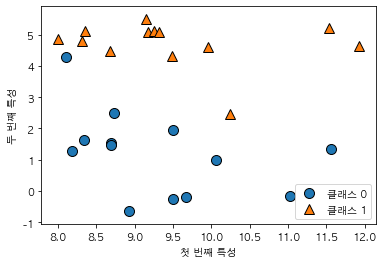

In [11]:
#### forge dataset

X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape : ", X.shape)

Text(0, 0.5, '타깃')

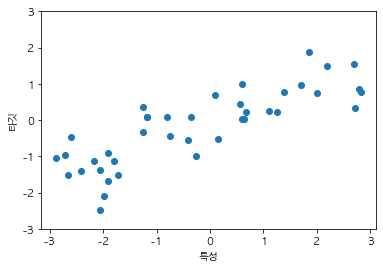

In [12]:
#### wave dataset

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')

In [17]:
#### cancer dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())
print("유방암 데이터의 형태 : ", cancer.data.shape)
print("클래스 별 샘플 개수:\n", {n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print("특성 이름:\n", cancer.feature_names)

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태 :  (569, 30)
클래스 별 샘플 개수:
 {'malignant': 212, 'benign': 357}
특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [19]:
#### boston housing dataset

from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 : ", boston.data.shape)

X, y = mglearn.datasets.load_extended_boston()
print("X.shape : ", X.shape)

데이터의 형태 :  (506, 13)
X.shape :  (506, 104)


#### 2.3.2 K-최근접 이웃(K-Nearest Neighbors)

/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


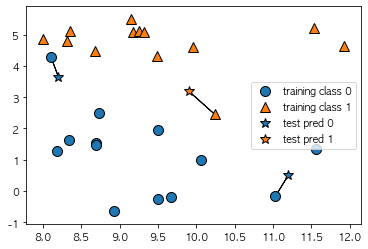

In [20]:
#### k=1인 가장 간단한 K-NN
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


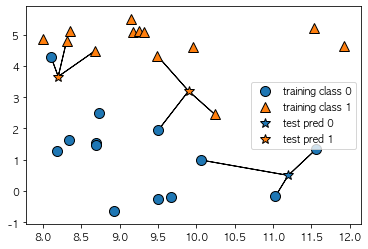

In [21]:
#### k=3인 K-NN
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [24]:
from sklearn.model_selection import train_test_split
#### dataset load
X,y = mglearn.datasets.make_forge()

#### train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### knn model instance 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

#### train knn model
clf.fit(X_train, y_train)

#### predict
print("테스트 세트 예측 : ", clf.predict(X_test))

#### 평가
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측 :  [1 0 1 0 1 0 0]
테스트 세트 정확도 : 0.86


/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


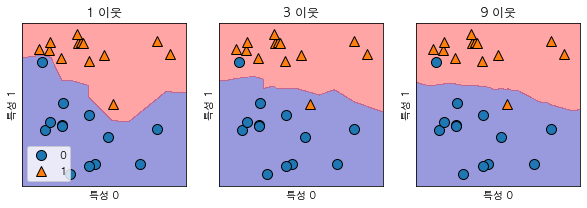

In [25]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n, ax in zip([1,3,9], axes):
    #### fit 메소드는 self 오브젝트를 리턴
    clf = KNeighborsClassifier(n_neighbors=n).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend(loc=3)

#### 이웃의 개수를 적게 사용할 수록 결정 경계가 train dataset에 가깝게 따라가고, 이웃의 개수를 많이 사용할수록 부드러운 결정경계(단순한 모델)를 가짐
#### 이웃을 적게 사용하면 복잡한 모델이 되고, 이웃을 많이 사용하면 모델의 복잡도가 낮아짐

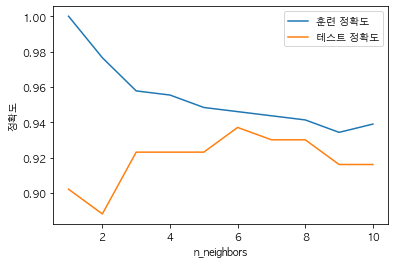

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = '훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label = '테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

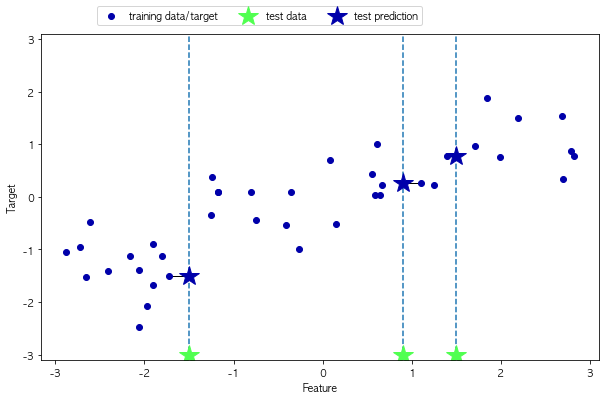

In [28]:
#### k-최근접 이웃 회귀
mglearn.plots.plot_knn_regression(n_neighbors=1)

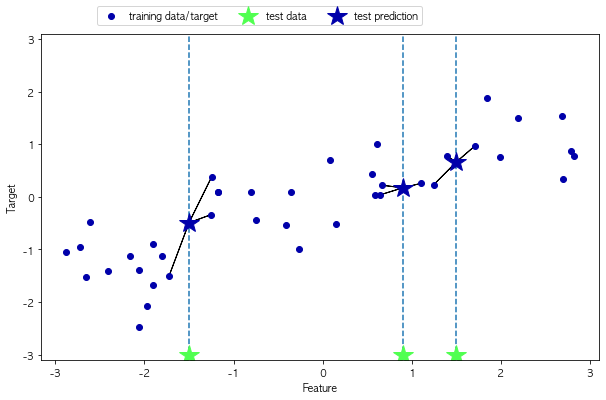

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [31]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("테스트 세트 예측:\n", reg.predict(X_test))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


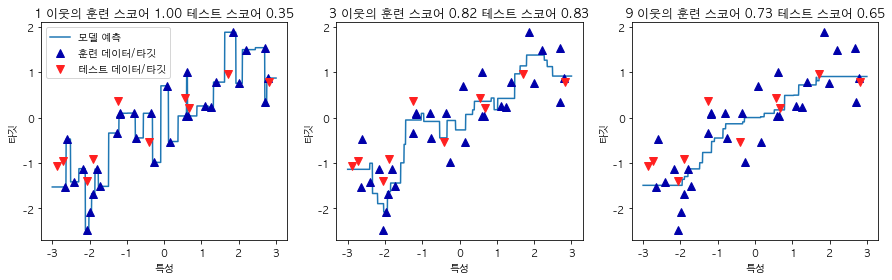

In [33]:
fig, axes = plt.subplots(1,3, figsize =(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} 이웃의 훈련 스코어 {:.2f} 테스트 스코어 {:.2f}".format(n, reg.score(X_train, y_train),reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(['모델 예측', '훈련 데이터/타깃', '테스트 데이터/타깃'], loc='best')

#### 2.3.3 선형 모델
#### 선형 모델 : 입력 특성에 대한 선형 함수를 만들어 예측을 수행

w[0]: 0.393906  b: -0.031804


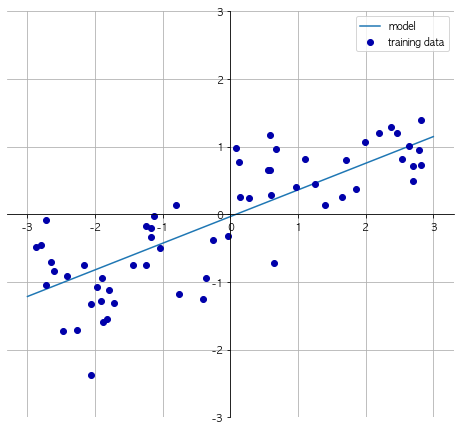

In [34]:
mglearn.plots.plot_linear_regression_wave()

#### 선형 회귀(linear regressiong) : 최소제곱법(OLS, ordinary lesat squre)를 활용 / 평균제곱오차(MSE)를 활용하여 최소화

In [35]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_ : ", lr.coef_)
print("lr.intercept_ : ", lr.intercept_)
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_ :  [0.39390555]
lr.intercept_ :  -0.03180434302675973
훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [36]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75
------------------------------
훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64
------------------------------
훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77
------------------------------


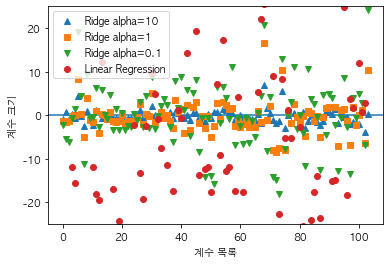

In [42]:
#### 리지(Ridge) : 모델을 단순하게(계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공
#### alpha 매ㅐ변수로 훈련 세터의 성능 대비 모델을 얼마나 단순화 할 지 지정
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))
print("------------------------------")
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))
print("------------------------------")
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))
print("------------------------------")

plt.plot(ridge10.coef_, '^', label = "Ridge alpha=10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label  = 'Linear Regression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

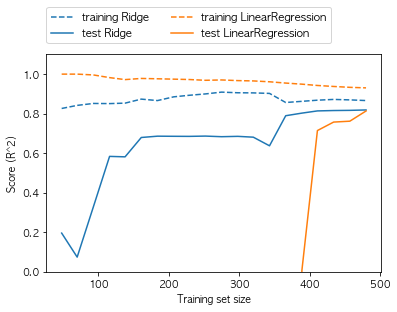

In [43]:
#### 두 모델 모두 성능은 데이터 수가 많아 질수록 좋아짐 / 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 수 있음
mglearn.plots.plot_ridge_n_samples()

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 :  4
---------------------------
훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 :  33
---------------------------
훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수 :  96
---------------------------


Text(0, 0.5, '계수  크기')

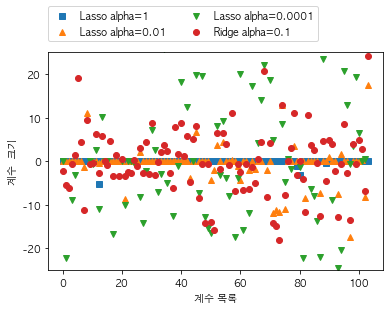

In [48]:
#### 라소(Lasso) - L1규제 / feature selection 역할 수행

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso.coef_ !=0))
print("---------------------------")

lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso001.coef_ !=0))
print("---------------------------")

lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso00001.coef_ !=0))
print("---------------------------")

plt.plot(lasso.coef_, 's', label = 'Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label = 'Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label = 'Lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label = 'Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수  크기")

/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


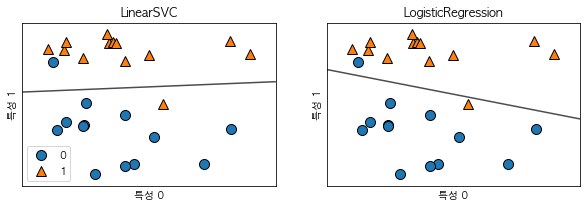

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
    
axes[0].legend()

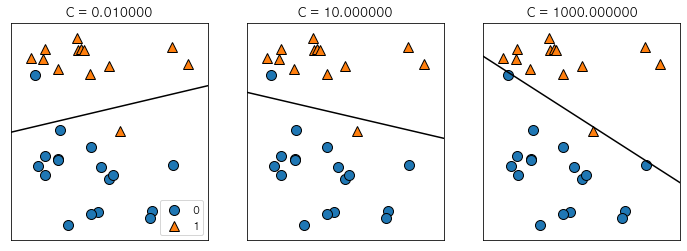

In [50]:
mglearn.plots.plot_linear_svc_regularization()

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958
----------------------
훈련 세트 점수 : 0.986
테스트 세트 점수 : 0.965
----------------------
훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951
----------------------


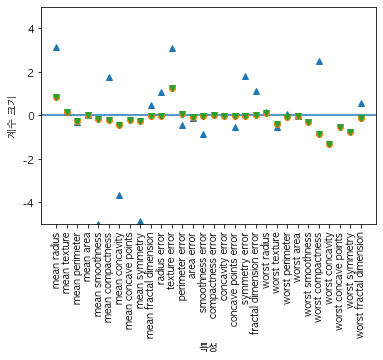

In [53]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))
print("----------------------")

logreg100 = LogisticRegression(C = 100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))
print("----------------------")

logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))
print("----------------------")

plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.show()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


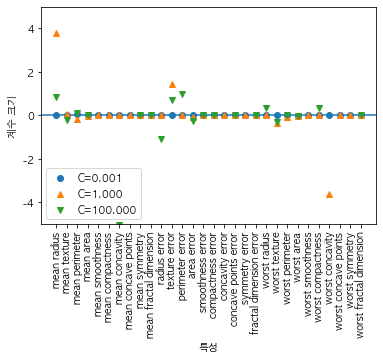

In [55]:
for C, marker in zip([0.001, 1, 100] ,['o', '^','v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label = "C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend(loc=3)

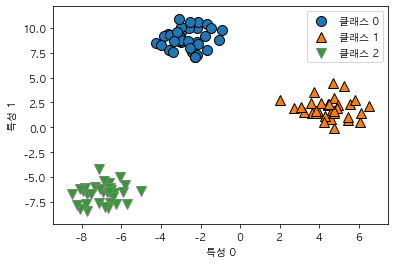

In [56]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2'])

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


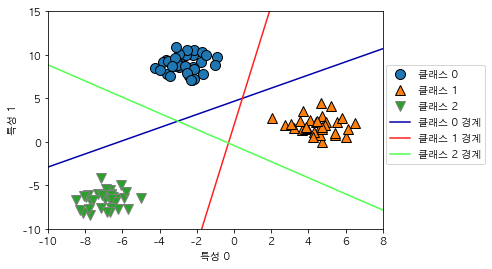

In [58]:
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, .3))

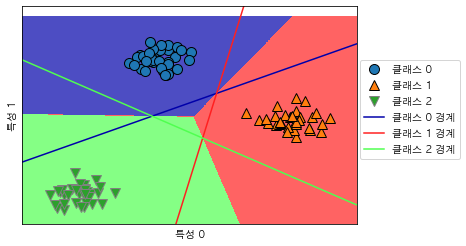

In [59]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, .3))

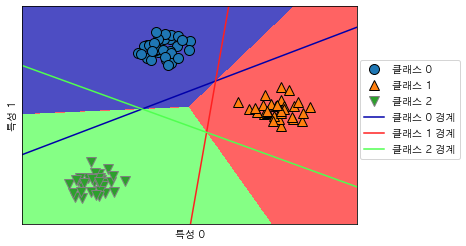

In [61]:
from sklearn.linear_model import SGDClassifier
sgd_c = SGDClassifier(alpha=.01, learning_rate='adaptive', eta0=.1, random_state=42, n_jobs=1)
sgd_c.fit(X,y)
mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)

plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, .3))

#### 2.3.4 나이브 베이즈 분류기
#### GaussianNB : 연속적인 어떤 데이터에도 적용 가능
#### BernoulliNB : 이진 데이터 / 텍스트 분류에 활용 / 클래스별로 각 특성의 분산과 평균을 저장
#### MultinomialNB : 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트) / 텍스트 분류에 활용 / 클래스별로 특성의 평균을 계산

In [63]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)
print('특성 카운트 : \n', counts)

특성 카운트 : 
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### 2.3.5 결정 트리
#### 결정 트리 : 분류와 회귀에 널리 활용
#### 사전 가지치기 : 트리 생성을 일찍 중단 / 트리의 최대 깊이나 리프틔 최대 개수를 제한하거나 노드가 분할하기 위한 포인트의 최소 개수를 지정
#### (사후) 가지치기 : 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합

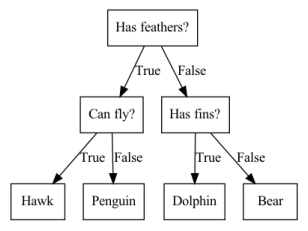

In [64]:
mglearn.plots.plot_animal_tree()

In [66]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


In [67]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


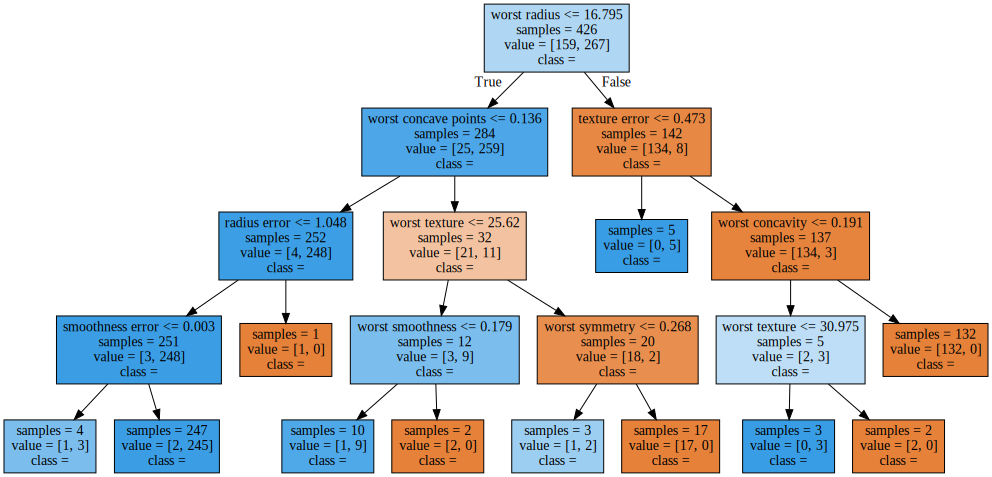

In [69]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ['악성', '양성'], feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

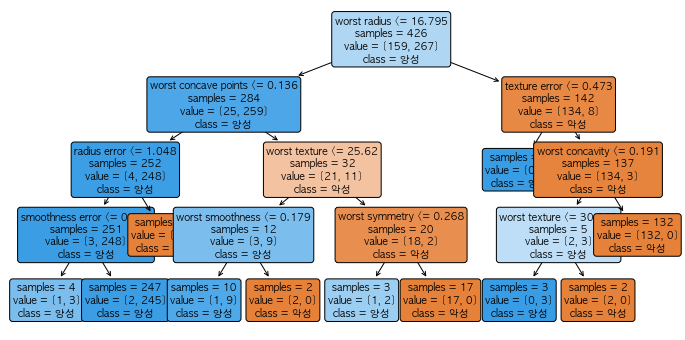

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(tree, class_names=['악성', '양성'], feature_names=cancer.feature_names, impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

In [73]:
print('특성 중요도 : \n', tree.feature_importances_)

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


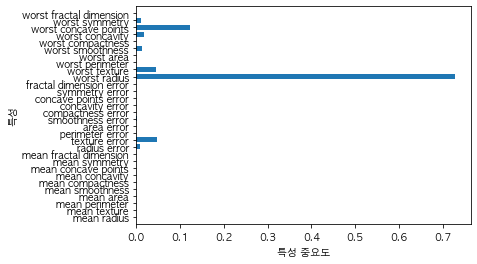

In [74]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


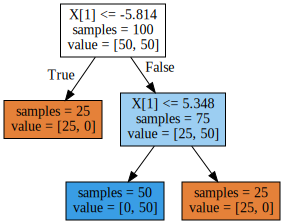

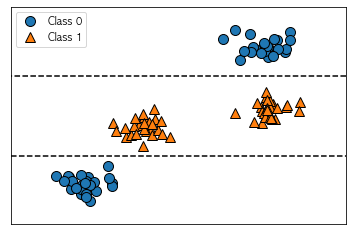

In [75]:
mglearn.plots.plot_tree_not_monotone()

Text(0, 0.5, '가격')

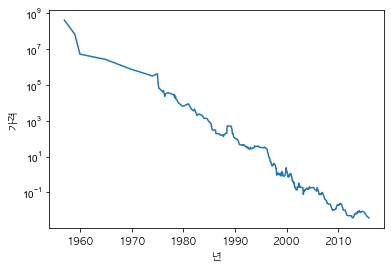

In [77]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


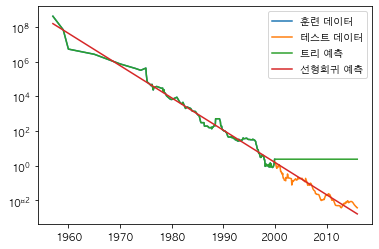

In [81]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측')
plt.legend()

#### 2.3.6 결정 트리의 앙상블
#### 앙상블 : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 반드는 기법
#### 랜덤 포레스트(random forest) & 그레이디언트 부스팅(gradient boosting) : 결정 트리를 모델의 기본 구성요소로 활용
#### 랜덤 포레스트 : 조금씩 다른 여러 결정 트리의 묶음 / 과대적합된 여러 개의 결정 트리의 결과를 평균 내여 과대적합을 방지 

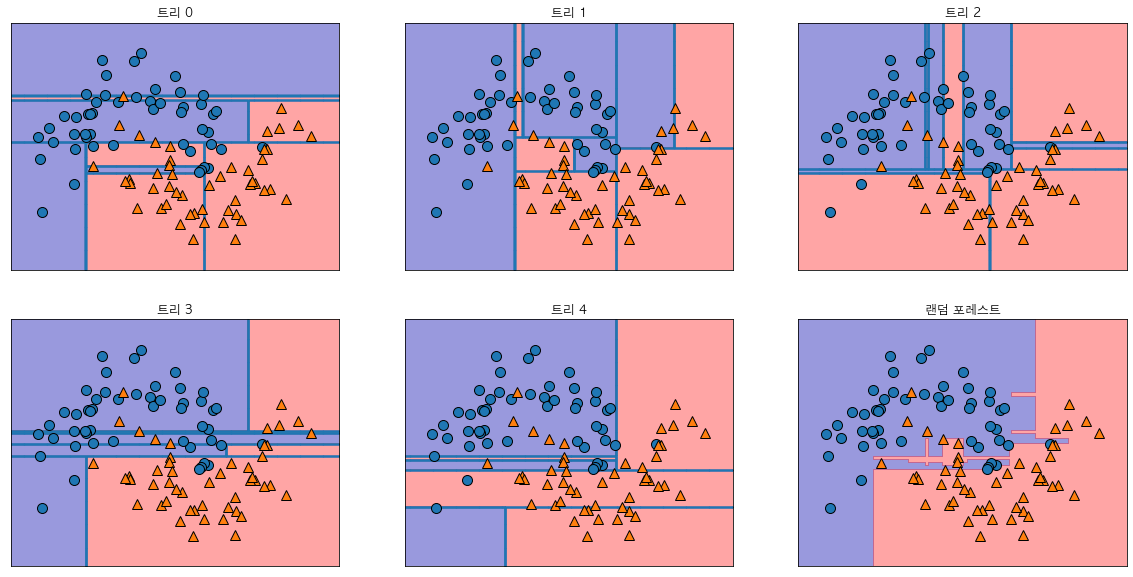

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


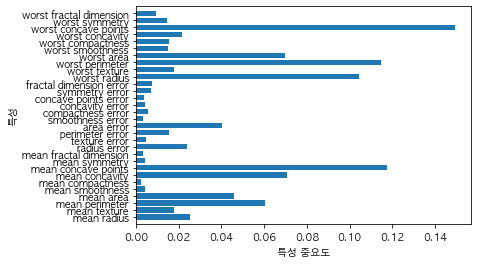

In [83]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

plot_feature_importances_cancer(forest)

#### 랜덤 포레스트는 성능이 매우 뛰어나고, 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없음 / n_jobs 매개변수를 활용하여 병렬처리 가능 / 랜덤하기 때문에 동일한 결과를 얻기 위해서는 random_state 값을 지정 / 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않음 / 메모리를 많이 사용하며 훈련과 예측이 느림

#### 그래디언트 부스팅 회귀트리 : 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성 / 무작위성이 없음 / 깊지 않은 트리를 사용하여 메모리를 적게 사용하고 예측이 빠름 / 간단한 모델(약한 학습기, weak learner)을 많이 연결하는 것이 기본 아이디어 / 각각의 트리는 데이터 일부에 대해서만 예측을 잘 수행할 수 있어 트리가 많이 추가될수록 성능이 향상 

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))
print("-----------------------------")

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))
print("-----------------------------")

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=.01)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))
print("-----------------------------")

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
-----------------------------
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972
-----------------------------
훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965
-----------------------------


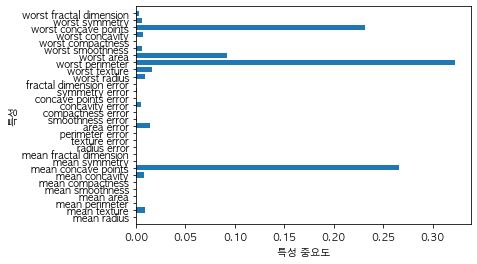

In [86]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

#### 그레이디언트 부스팅 결정 트리 : 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 긴 것이 큰 단점 / 특성 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 작동 / 희소한 고차원 데이터에는 잘 작동하지 않음(트리 기반 모델의 특징) / 통상 그레이디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않도록 함

#### 2.3.7 그 외 다른 앙상블
#### 배깅(bagging), 에이다부스트(AdaBoost), 엑스트라 트리(Extra-tree), 히스토그램 기반 그레이디언트 부스팅(Histogram-based Gradient Boosting)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm ,ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)

훈련 세트 정확도 : 0.962
테스트 세트 정확도 : 0.958
OOB 샘플 정확도 : 0.948
-----------------------------


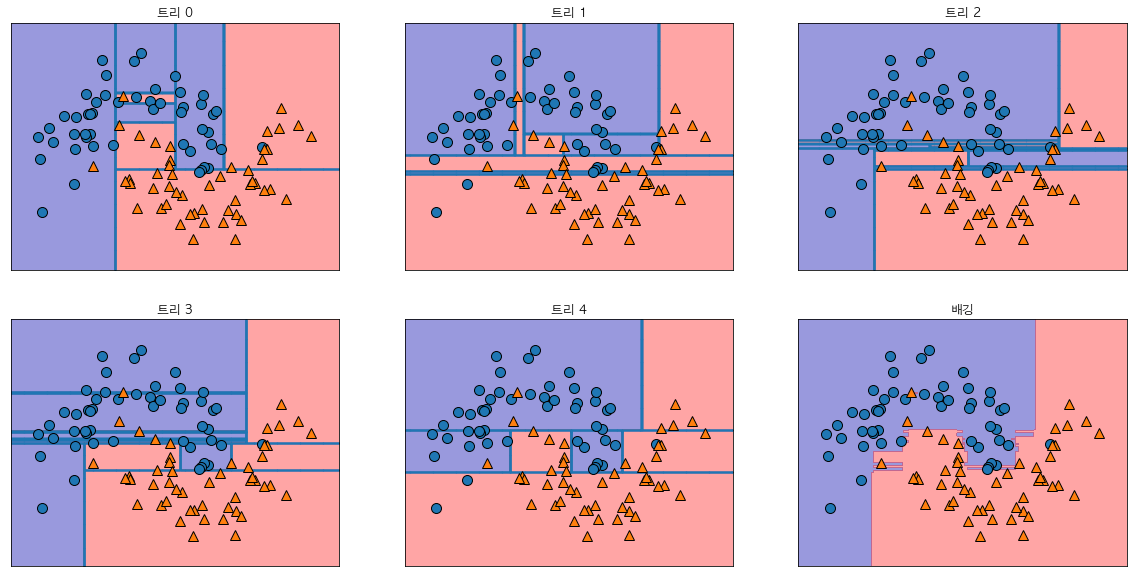

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
OOB 샘플 정확도 : 0.948
-----------------------------


In [98]:
#### 배깅 : 중복을 허용한 랜덤 샘플링으로 만든 훈련 세틀르 사용하여 분류기를 각기 다르게 학습
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100, oob_score=True, n_jobs=1, random_state=42)
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플 정확도 : {:.3f}".format(bagging.oob_score_))
print("-----------------------------")

from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=1, random_state=42)
bagging.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1,-1].set_title("배깅")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

bagging = BaggingClassifier(DecisionTreeClassifier(), oob_score=True, n_estimators=100, n_jobs=1, random_state=42)
bagging.fit(Xc_train, yc_train)
print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플 정확도 : {:.3f}".format(bagging.oob_score_))
print("-----------------------------")

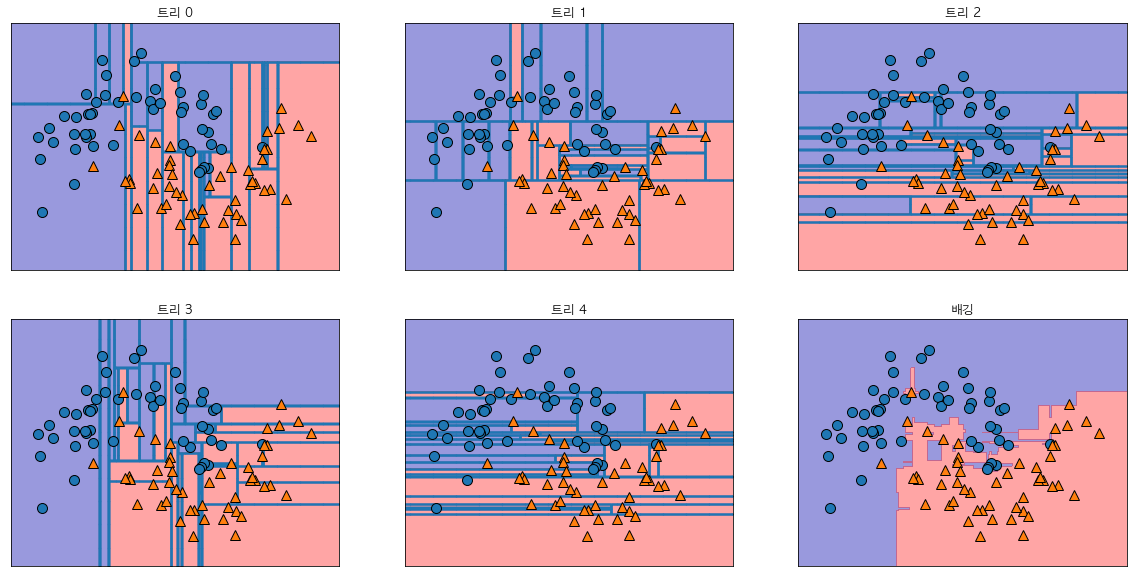

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [100]:
#### 엑스트라 트리 : 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾음 
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1,-1].set_title("배깅")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)
print("훈련 세트 정확도 : {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(xtree.score(Xc_test, yc_test)))


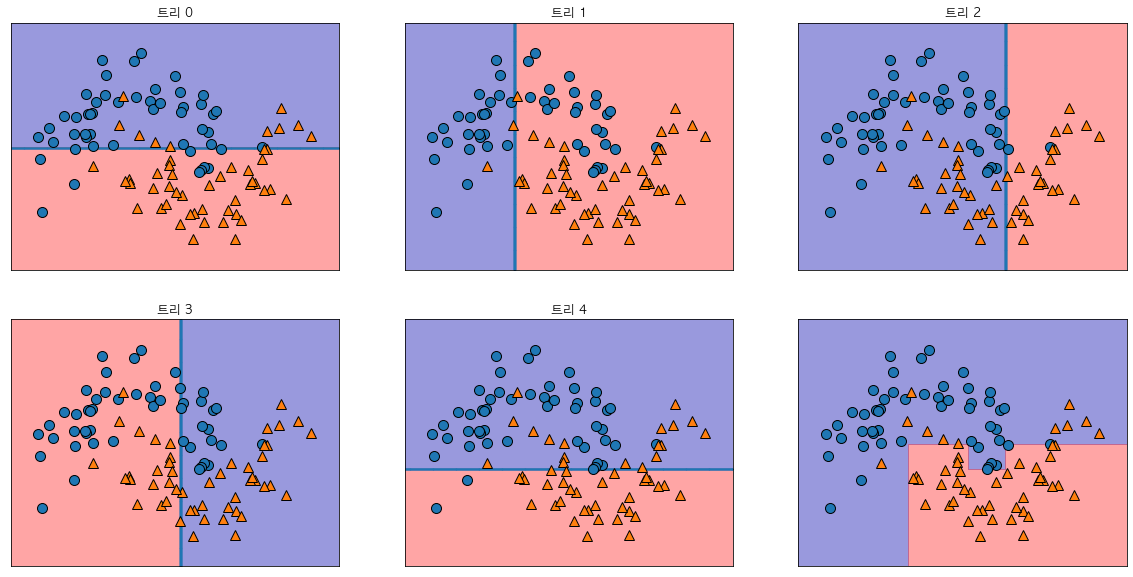

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.986


In [101]:
#### 에이다부스트 : Adaptive Boosting / 약한 학습기 활용 / 이전 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 학습
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(Xc_train, yc_train)
print("훈련 세트 정확도 : {:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(ada.score(Xc_test, yc_test)))

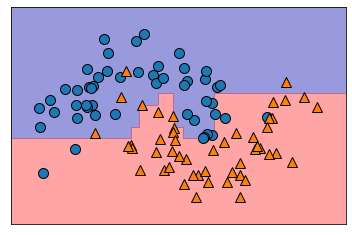

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.979


In [105]:
#### 히스토그램 기반 부스팅 : 입력 특성을 256개의 구간으로 나누기 떄문에 노드를 분할할 때 최적의 분할을 빠르게 찾을 수 있음 / 누락된 값을 위한 전처리가 필요 없음
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xm_train, ym_train)
mglearn.plots.plot_2d_separator(hgb, Xm, fill=True, alpha=.4)
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

hgb = HistGradientBoostingClassifier(random_state=0)
hgb.fit(Xc_train, yc_train)
print("훈련 세트 정확도 : {:.3f}".format(hgb.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(hgb.score(Xc_test, yc_test)))

#### 2.3.8 커널 서포트 벡터 머신

Text(0, 0.5, '특성 1')

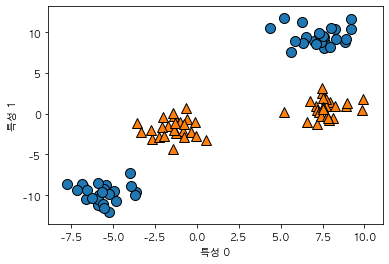

In [106]:
X, y = make_blobs(centers=4, random_state=8)
y = y %2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

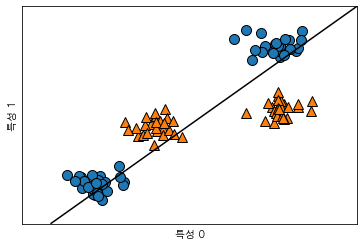

In [107]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

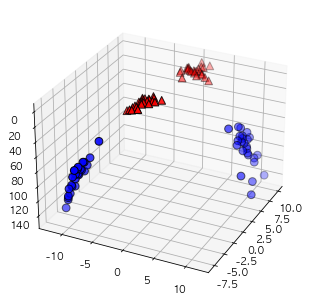

In [111]:
X_new = np.hstack([X, X[:,  1:] ** 2])
import matplotlib
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
if matplotlib.__version__ >= '3.4':
    ax = Axes3D(figurere, elev=-152, azim=-26, auto_add_to_figure = False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolors='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker = '^', cmap=mglearn.cm2, s=60, edgecolors='k')

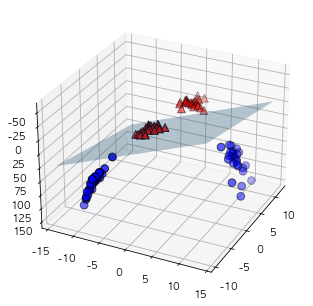

In [113]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
if matplotlib.__version__ >= '3.4':
    ax = Axes3D(figurere, elev=-152, azim=-26, auto_add_to_figure = False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() +2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() +2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride =8, cstride=8, alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolors='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker = '^', cmap=mglearn.cm2, s=60, edgecolors='k')

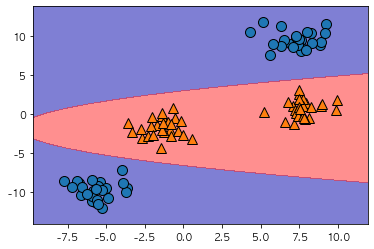

In [114]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#### 서포트 벡터 : 결정 경계를 만드는데 영향을 주는 데이터 / 두 클래스 사이의 경계에 위치한 데이터 포인트

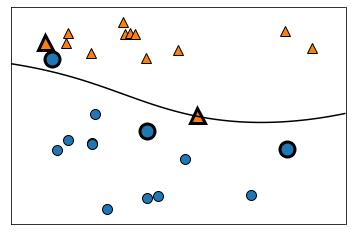

In [115]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc= SVC()
svc.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도 : 0.904
테스트 세트 정확도 : 0.937


#### 커널 세포트 벡터 머신 : 강력한 모델 / 다양한 데이터셋에서 잘 작동 / 데이터의 특성이 몇 개 안되더라도 복잡한 결정 경계 생성 가능 / 샘플이 많을 때는 잘 맞지 않음 / 데이터 전처리와 매개변수 설정에 주의 필요

#### 2.3.9 신경망(딥러닝) 
#### 다층 퍼셉트론(MLP) : 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습 / 많은 계수(가중치) 학습 필요 / 기존의 선형 모델을 벗어나기 위해 은닉 유닛의 가중치 합을 계산한 결과에 비선형 함수(ReLU, tanh)를 적용

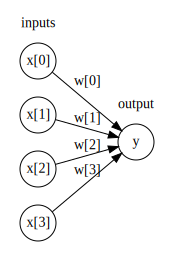

In [117]:
mglearn.plots.plot_logistic_regression_graph()

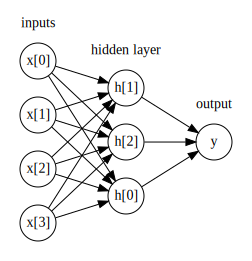

In [119]:
mglearn.plots.plot_single_hidden_layer_graph()

Text(0, 0.5, 'relu(x), tanh(x)')

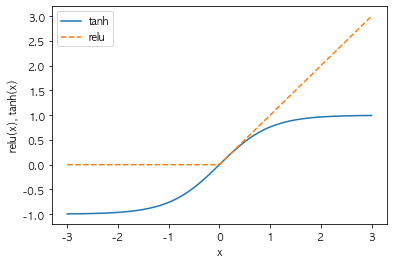

In [122]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = 'tanh')
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

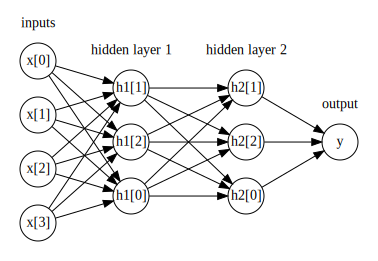

In [123]:
mglearn.plots.plot_two_hidden_layer_graph()

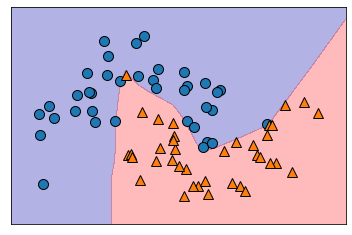

In [124]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

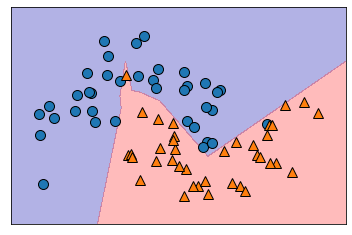

In [125]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

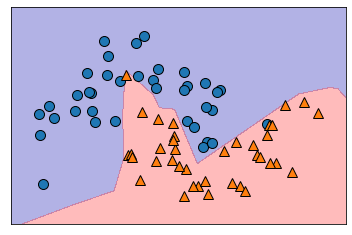

In [126]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

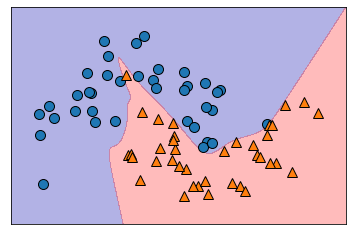

In [127]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10], activation='tanh', max_iter=1000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [129]:
print("유방암 데이터의 특성별 최대값 : \n", cancer.data.max(axis=0))

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test, y_test)))

유방암 데이터의 특성별 최대값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
훈련 세트 정확도 : 0.939
테스트 세트 정확도 : 0.916


In [130]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.993
테스트 세트 정확도 : 0.965


/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [132]:
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


In [133]:
mlp = MLPClassifier(random_state=42, max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.986
테스트 세트 정확도 : 0.979


#### 신경망 : 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있음 / 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 신경망은 좋은 성능을 가짐 / 학습이 오래 걸리는 단점 / 데이터 전처리에 주의 / 동질적 데이터에서 잘 작동 / 이질적인 데이터라면 트리기반 모델이 더 잘 작동할 수 있음

### 2.4 분류 예측의 불확실성 추정
#### decision_function : 모델이 데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도 / 양수값은 양수 클래스를 의미, 음수값은 다른 클래스를 의미 / 결정 함수 결과의 부호만 보고 예측 결과 파악 가능
#### predict_proba : 각 클래스에 대한 확률

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=.25, factor=.4, random_state=1)
y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

print('X_test.shape : ', X_test.shape)
print("결정 함수 결과 형태 : ", gbrt.decision_function(X_test).shape)
print("결정 함수 : \n", gbrt.decision_function(X_test)[:6])
print("임계치와 결정 함수 결과 비교 : \n", gbrt.decision_function(X_test)>0)
print("예측 \n", gbrt.predict(X_test))

greate_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greate_zero]
print("pred 예측 결과와 같다 : ", np.all(pred == gbrt.predict(X_test)))

decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값 : {:.2f}, 결정 함수 최대값 : {:.2f}".format(np.min(decision_function), np.max(decision_function)))

print('확률 값의 형태 :', gbrt.predict_proba(X_test).shape)
print('예측 확률 : \n', gbrt.predict_proba(X_test[:6]))

X_test.shape :  (25, 2)
결정 함수 결과 형태 :  (25,)
결정 함수 : 
 [ 4.74209783  1.9389302  -4.3537577  -4.45093554  5.3118128   5.1908374 ]
임계치와 결정 함수 결과 비교 : 
 [ True  True False False  True  True False  True  True  True False  True
  True  True  True False  True False  True  True  True  True  True False
 False]
예측 
 ['red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'red' 'red' 'blue' 'red' 'blue' 'red' 'red' 'red' 'red' 'red'
 'blue' 'blue']
pred 예측 결과와 같다 :  True
결정 함수 최솟값 : -8.72, 결정 함수 최대값 : 5.31
